In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from xgboost import XGBClassifier


In [10]:
# Load the Titanic dataset
titanic_data = pd.read_csv('train.csv')

# Preprocess the data
titanic_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data['Embarked'] = titanic_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic_data.fillna(titanic_data.mean(), inplace=True)


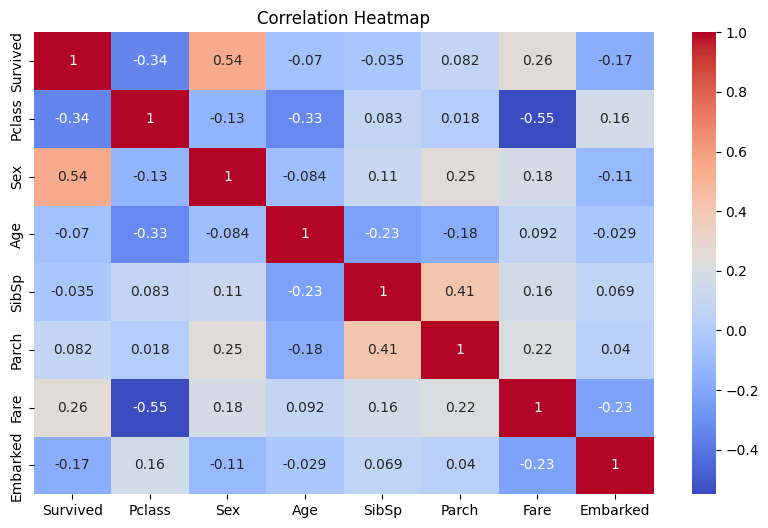

In [11]:
# Visualize correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [12]:
# Split the data into features and target

X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Initialize the XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Cross-validation scores: [0.78321678 0.78321678 0.8028169  0.78169014 0.80985915]
Mean CV accuracy: 0.7921599527233331


In [14]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 5, 'n_estimators': 50}


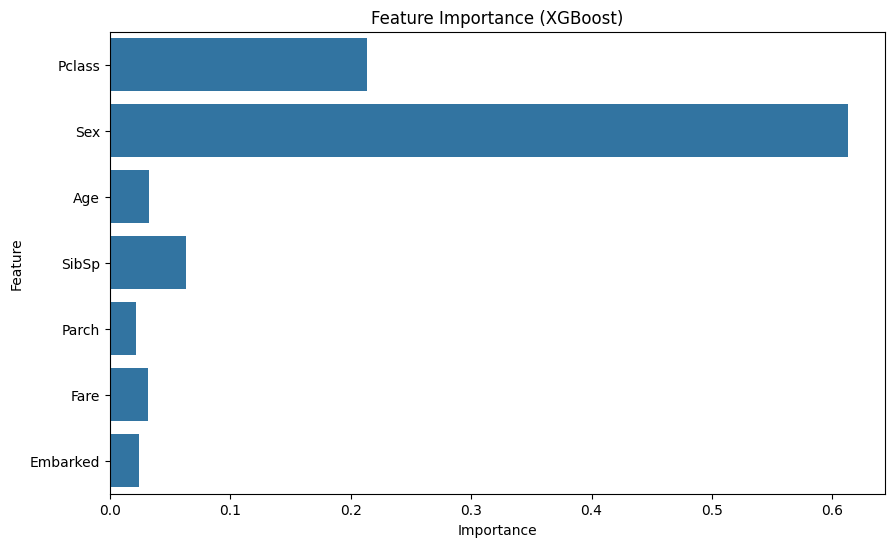

In [15]:
# Train the model with the best parameters
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train, y_train)

# Feature importance
feature_importance = best_xgb_model.feature_importances_

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X.columns)
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [16]:
# Evaluate the model on the test set
test_accuracy = best_xgb_model.score(X_test, y_test)
print("Test accuracy:", test_accuracy)


Test accuracy: 0.8268156424581006
